In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
%matplotlib inline


Bad key text.latex.preview in file C:\Users\Prabh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Prabh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Prabh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
df_air=pd.read_csv('AirPassengers.csv')
df_air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df_air.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df_air.rename(columns={'#Passengers':'Thousands of Passengers'},inplace=True)

In [6]:
df_air

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
 df_air['Month']=pd.to_datetime(df_air['Month'])

In [11]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [13]:
df_air.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

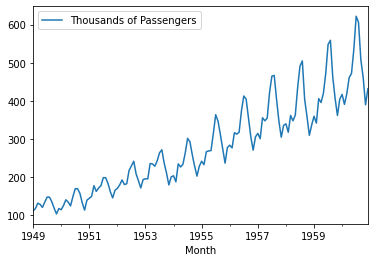

In [14]:
df_air.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis, result the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adf_test(df_air['Thousands of Passengers'])

ADF Statistics: 0.8153688792060543
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


We have seen that the data is no stationary to make it stationary we use differences

#### Passenger First Difference

In [22]:
df_air['Passengers First Difference']=df_air['Thousands of Passengers']-df_air['Thousands of Passengers'].shift(1)
df_air

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [25]:
# checking wheather this difference statisfies the test

adf_test(df_air['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value: 0.054213290283824954
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [27]:
df_air['Passengers Second Difference']=df_air['Passengers First Difference']-df_air['Passengers First Difference'].shift(1)

In [29]:
adf_test(df_air['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468488
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, result the null hypothesis. Data has no unit root and is stationary


#### Checking for seasonal(12 months) difference

In [31]:

df_air['Passengers 12 Difference']=df_air['Thousands of Passengers']-df_air['Thousands of Passengers'].shift(12)
adf_test(df_air['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, result the null hypothesis. Data has no unit root and is stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

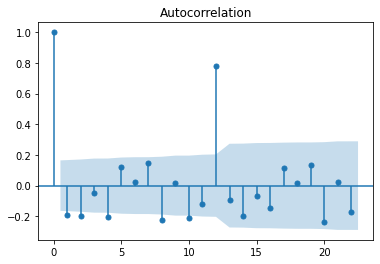

In [33]:
acf = plot_acf(df_air["Passengers Second Difference"].dropna())

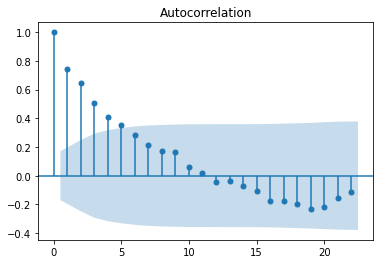

In [35]:
acf12 = plot_acf(df_air["Passengers 12 Difference"].dropna())

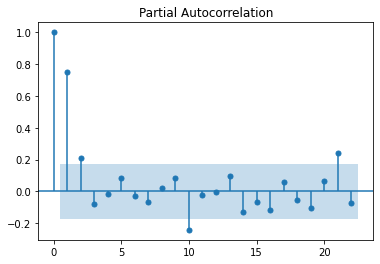

In [36]:
pacf12 = plot_pacf(df_air["Passengers 12 Difference"].dropna())

C:\Users\Prabh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


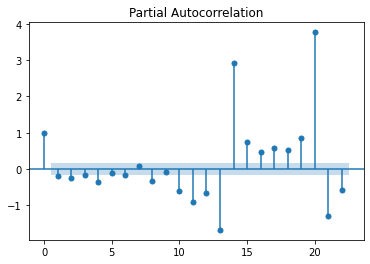

In [37]:
result = plot_pacf(df_air["Passengers Second Difference"].dropna())

In [38]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [39]:
train_data=df_air[:train_dataset_end]
test_data=df_air[train_dataset_end+timedelta(days=1):test_dataset_end]

In [40]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [41]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0
